## Thompson_Sampling


**This dataset is to check whether a customer click on Adress or not**

### Import the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Load and read the dataset

In [2]:
df = pd.read_csv("Ads_CTR_Optimisation.csv")
df.head(10)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


In [3]:
df.tail(10)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
9990,0,0,0,1,0,0,0,0,0,0
9991,0,1,0,1,1,0,1,0,0,0
9992,0,0,0,1,0,0,1,0,0,0
9993,0,0,0,0,1,0,0,0,1,0
9994,0,0,1,0,0,0,0,0,1,0
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0
9999,0,1,0,0,0,0,0,0,0,0


In [4]:
df.sample(10)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
1109,0,0,0,0,0,0,1,1,0,0
7172,1,0,0,0,0,0,0,1,0,0
2896,0,0,0,0,0,0,0,0,0,0
198,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
6501,0,0,0,0,1,0,1,0,0,0
2923,0,1,0,0,0,0,0,0,1,0
6609,1,0,0,0,0,0,0,1,0,0
5196,0,0,0,0,1,0,0,0,0,0
5529,0,1,0,0,0,0,0,0,0,0


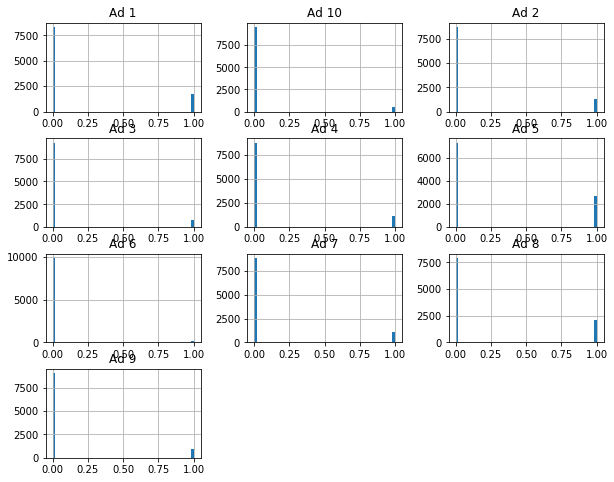

In [5]:
df.hist(bins = 50, figsize=(10, 8))
plt.show()

### Basic insight to the dataset

In [6]:
df.shape

(10000, 10)

In [7]:
df.dtypes

Ad 1     int64
Ad 2     int64
Ad 3     int64
Ad 4     int64
Ad 5     int64
Ad 6     int64
Ad 7     int64
Ad 8     int64
Ad 9     int64
Ad 10    int64
dtype: object

In [8]:
df.columns.values

array(['Ad 1', 'Ad 2', 'Ad 3', 'Ad 4', 'Ad 5', 'Ad 6', 'Ad 7', 'Ad 8',
       'Ad 9', 'Ad 10'], dtype=object)

In [9]:
df.index

RangeIndex(start=0, stop=10000, step=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB


### Descriptive Statistic

In [11]:
df.describe()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.170300,0.129500,0.072800,0.119600,0.269500,0.012600,0.111200,0.209100,0.095200,0.04890
std,0.375915,0.335769,0.259821,0.324509,0.443722,0.111546,0.314395,0.406686,0.293506,0.21567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ad 1,10000.0,0.1703,0.375915,0.0,0.0,0.0,0.0,1.0
Ad 2,10000.0,0.1295,0.335769,0.0,0.0,0.0,0.0,1.0
Ad 3,10000.0,0.0728,0.259821,0.0,0.0,0.0,0.0,1.0
Ad 4,10000.0,0.1196,0.324509,0.0,0.0,0.0,0.0,1.0
Ad 5,10000.0,0.2695,0.443722,0.0,0.0,0.0,1.0,1.0
Ad 6,10000.0,0.0126,0.111546,0.0,0.0,0.0,0.0,1.0
Ad 7,10000.0,0.1112,0.314395,0.0,0.0,0.0,0.0,1.0
Ad 8,10000.0,0.2091,0.406686,0.0,0.0,0.0,0.0,1.0
Ad 9,10000.0,0.0952,0.293506,0.0,0.0,0.0,0.0,1.0
Ad 10,10000.0,0.0489,0.215670,0.0,0.0,0.0,0.0,1.0


In [13]:
df.corr()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
Ad 1,1.000000,-0.007558,-0.021481,0.006002,0.009618,0.006063,-0.002855,0.019562,0.003512,-0.005276
Ad 2,-0.007558,1.000000,0.008855,-0.008152,-0.009399,-0.008857,-0.001899,-0.013025,-0.002318,0.006456
Ad 3,-0.021481,0.008855,1.000000,0.010594,0.006770,-0.014399,0.017197,0.004520,-0.005647,0.004285
Ad 4,0.006002,-0.008152,0.010594,1.000000,-0.014115,-0.008481,0.007847,0.005241,0.000148,0.013598
Ad 5,0.009618,-0.009399,0.006770,-0.014115,1.000000,0.010190,0.006679,-0.010821,-0.003505,-0.008136
Ad 6,0.006063,-0.008857,-0.014399,-0.008481,0.010190,1.000000,0.008523,0.014668,-0.003040,-0.004828
Ad 7,-0.002855,-0.001899,0.017197,0.007847,0.006679,0.008523,1.000000,0.000376,-0.006354,-0.006456
Ad 8,0.019562,-0.013025,0.004520,0.005241,-0.010821,0.014668,0.000376,1.000000,-0.000891,-0.005986
Ad 9,0.003512,-0.002318,-0.005647,0.000148,-0.003505,-0.003040,-0.006354,-0.000891,1.000000,-0.002453
Ad 10,-0.005276,0.006456,0.004285,0.013598,-0.008136,-0.004828,-0.006456,-0.005986,-0.002453,1.000000


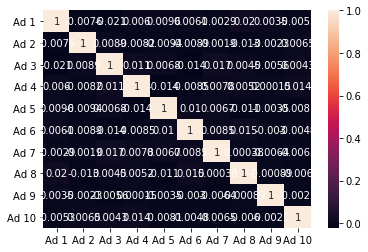

In [14]:
sns.heatmap(df.corr(), annot = True)
plt.show()

### Handling missing data

In [15]:
missing_data = df.isnull()
missing_data

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False


### Check the missing_data per column

In [16]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Ad 1
False    10000
Name: Ad 1, dtype: int64

Ad 2
False    10000
Name: Ad 2, dtype: int64

Ad 3
False    10000
Name: Ad 3, dtype: int64

Ad 4
False    10000
Name: Ad 4, dtype: int64

Ad 5
False    10000
Name: Ad 5, dtype: int64

Ad 6
False    10000
Name: Ad 6, dtype: int64

Ad 7
False    10000
Name: Ad 7, dtype: int64

Ad 8
False    10000
Name: Ad 8, dtype: int64

Ad 9
False    10000
Name: Ad 9, dtype: int64

Ad 10
False    10000
Name: Ad 10, dtype: int64



### How many missing value do we have

In [17]:
missing_value = df.isnull().sum()
missing_value

Ad 1     0
Ad 2     0
Ad 3     0
Ad 4     0
Ad 5     0
Ad 6     0
Ad 7     0
Ad 8     0
Ad 9     0
Ad 10    0
dtype: int64

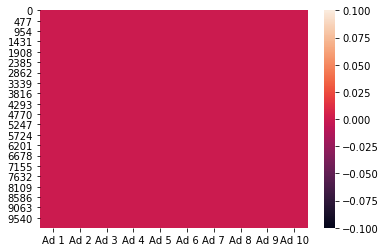

In [18]:
sns.heatmap(df.isnull())

### Implementing Thompson Sampling

In [19]:
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = df.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

## Let Visualize the results

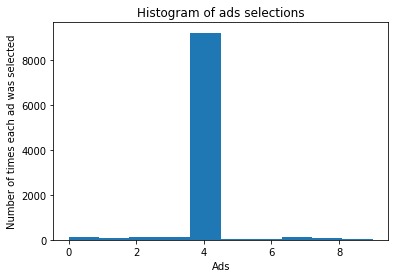

In [20]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()